In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('add_sales_data_2018.csv')

In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
data.shape

(205, 7)

# 1. Relationship between amount spent for advertising and profit generated

In [ ]:
# We can check the correlation between the variables using a heatmap.

<AxesSubplot:>

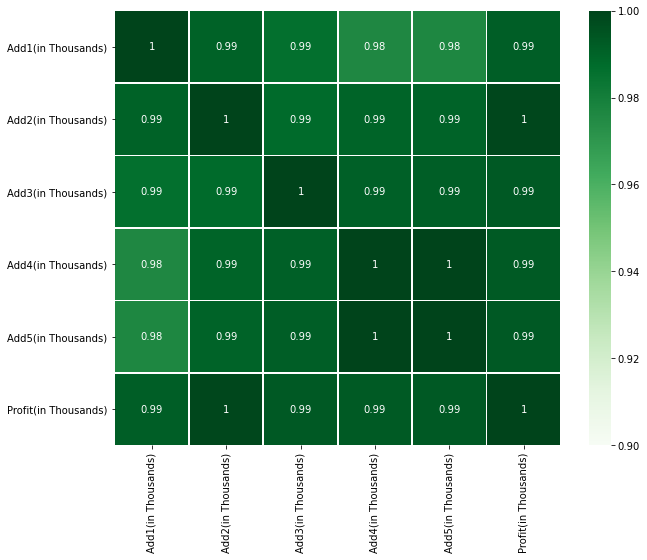

In [6]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmin=0.9, vmax=1, linewidth=0.8, cmap='Greens', annot=True)

In [ ]:
# All variables are highly correlated with each other and with profit.

# 2. Building regression model to predict profit

In [7]:
# First, assign the dependent variable and independent variable to y and x

y = data['Profit(in Thousands)']
x = data.drop(['Date','Profit(in Thousands)'], axis=1)

In [8]:
# Next, split the data into training and testing set respectively.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.25)

In [9]:
# Creating the linear model using LinearRegression()
lm = linear_model.LinearRegression()

In [10]:
model = lm.fit(x_train, y_train) #fitting the model using training sets of x and y

In [11]:
model.coef_ #coefficients of model features/independent variables

array([ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ])

In [12]:
model.intercept_ #intercept of model

0.0

In [13]:
model.score(x_train, y_train) #Return the coefficient of determination of the model.

1.0

In [14]:
pred = model.predict(x_test) #applying model to predict test set

In [15]:
pred

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457])

In [16]:
#Calculating mean squared error between testing set of y and predicted values

print('MSE of the model is', mean_squared_error(y_test, pred)) 

MSE of the model is 8.11273293080854e-25


# 3. Predict profit generated for new amount spent for advertising

In [17]:
new_ad = [[290,312,309,298,320]]

In [18]:
new_pred = model.predict(new_ad)

In [19]:
new_pred

array([5820.06])

In [ ]:
# Hence, for given amounts spent for advertising, the profit generated is 5820 (in Thousands).